In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib

In [19]:
PATH = '/home/linux2/Downloads/msfitcodes/'
file = 'ms_fit_joint_inf'
sys.path.insert(1, PATH)

In [20]:
from ms_fit_joint_inf import ms_fit_inf
from misc import RMS_data

In [21]:
font = {'family' : 'sans-serif',
        'size'   : 20,
        'sans-serif':['Lucida Grande']}

matplotlib.rc('font', **font)

In [22]:
x     = np.linspace(2.8, 3.8, 251)
y0    = 200
x0    = 150
alpha = -2.5

domain = 'log_log'
LOWF   = np.amin(x) #Need to fix this. By default it reduces an index
HGHF   = np.amax(x)
order  = 7
print(HGHF)


3.8


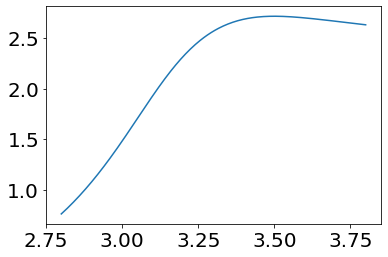

In [23]:
#y =( y0 * (x/x0)**alpha)+3
#plt.plot(y)

freq,res1,y=np.loadtxt("/home/linux2/Downloads/Farfield/farfield_finite/140mm_ground/residues.txt",usecols=(0,1,2),unpack=True)
plt.plot(x,y)


In [24]:
fit_params = {'domain':domain, 'xmin':LOWF, 'xmax':HGHF, 'rescale':True,'norder':order,\
         'niter':1, 'smooth':False, 'basin_iter_loops':100, 'xtol':1e-10, 'ftol':1e-10,\
         'temp':1e-9, 'stepsize':1e-9}

In [25]:
param, x_fit, imin, imax, fit, res, err \
= ms_fit_inf(x, y, **fit_params)

+------------------+--------------------+
|    Parameter     |       Value        |
+------------------+--------------------+
|       flag       |    251 elements    |
|      error       |    251 elements    |
|       xtol       |       1e-10        |
|       ftol       |       1e-10        |
|      domain      |      log_log       |
|     maxiter      |      100000.0      |
|      maxfev      |      100000.0      |
|       algo       |    Nelder-Mead     |
|      norder      |         7          |
|       temp       |       1e-09        |
|     stepsize     |       1e-09        |
|      niter       |         1          |
| basin_iter_loops |        100         |
|       xmin       |        2.8         |
|       xmax       |        3.8         |
|     rescale      |        True        |
|       seed       |         1          |
|     additive     |        True        |
|      joint       |       False        |
|      signal      |      [False]       |
|     add_ini      |        0.0   

In [27]:
f,sp1,spectra=np.loadtxt("/home/linux2/Downloads/Farfield/measured/3d patternresidues.txt",usecols=(0,1,2),unpack=True)

parammeas1, x_fitmeas1, iminmeas1, imaxmeas1, fitmeas1, resmeas1, errmeas1 \
= ms_fit_inf(x, spectra, **fit_params)

+------------------+--------------------+
|    Parameter     |       Value        |
+------------------+--------------------+
|       flag       |    251 elements    |
|      error       |    251 elements    |
|       xtol       |       1e-10        |
|       ftol       |       1e-10        |
|      domain      |      log_log       |
|     maxiter      |      100000.0      |
|      maxfev      |      100000.0      |
|       algo       |    Nelder-Mead     |
|      norder      |         7          |
|       temp       |       1e-09        |
|     stepsize     |       1e-09        |
|      niter       |         1          |
| basin_iter_loops |        100         |
|       xmin       |        2.8         |
|       xmax       |        3.8         |
|     rescale      |        True        |
|       seed       |         1          |
|     additive     |        True        |
|      joint       |       False        |
|      signal      |      [False]       |
|     add_ini      |        0.0   

250


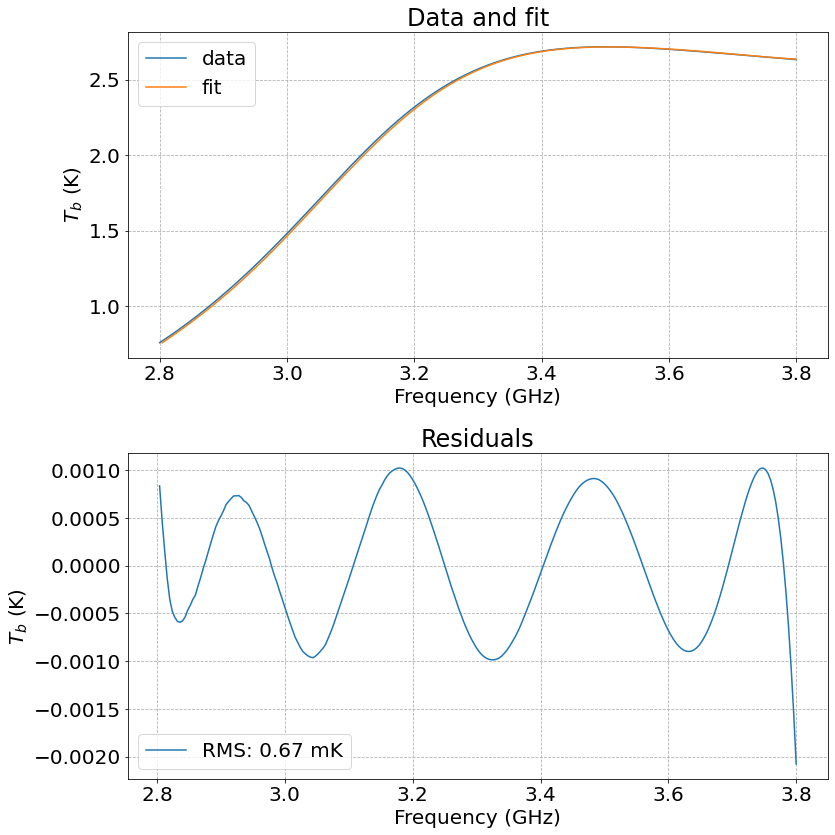

In [26]:
rms = RMS_data(np.ones(len(res)), res)
print(len(res))
nrow, ncol = 2, 1

xlabel = 'Frequency (GHz)'
ylabel = '$T_b$ (K)'
titles = ['Data and fit', 'Residuals']

fig, ax = plt.subplots(nrow, ncol, figsize=(12*ncol,6*nrow))
ax[0].plot(x, y, label='data')
ax[0].plot(x[1:251], fit, label='fit')
ax[1].plot(x[1:251], res, label='RMS: {:.2f} mK'.format(rms*1e3))

for val, axx in enumerate(ax):
    axx.set_xlabel(xlabel)
    axx.set_ylabel(ylabel)
    axx.set_title(titles[val])
    axx.grid(ls='--')
    axx.legend()

fig.tight_layout()
plt.show()

250


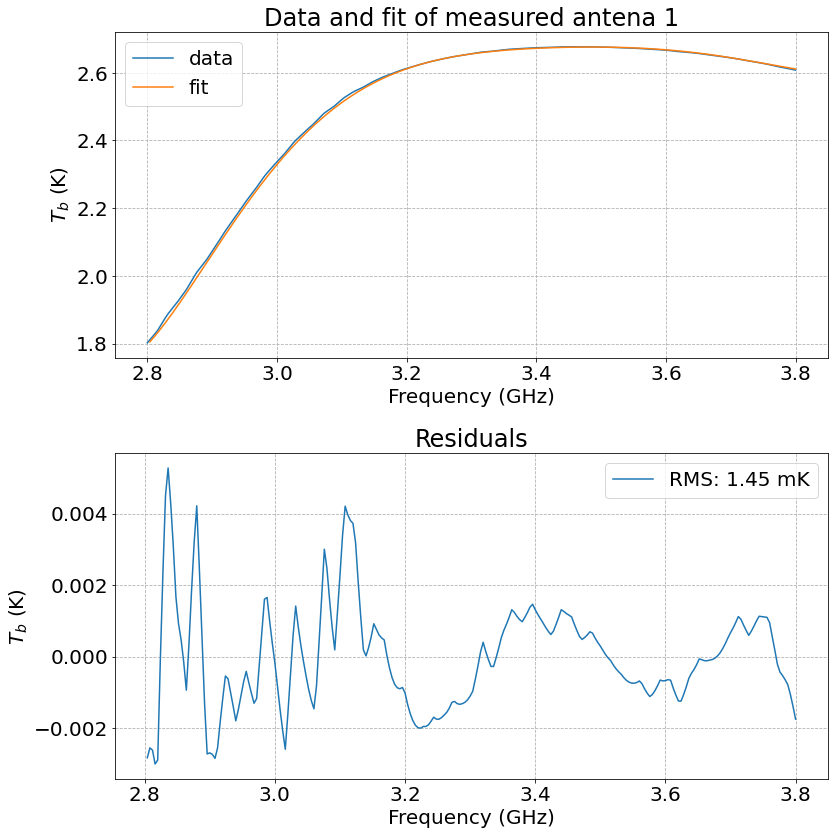

In [34]:
rms_meas1 = RMS_data(np.ones(len(resmeas1)), resmeas1)
print(len(resmeas1))
nrow, ncol = 2, 1

xlabel = 'Frequency (GHz)'
ylabel = '$T_b$ (K)'
titles = ['Data and fit of measured antena 1', 'Residuals']

fig, ax = plt.subplots(nrow, ncol, figsize=(12*ncol,6*nrow))
ax[0].plot(x, spectra, label='data')
ax[0].plot(x[1:251], fitmeas1, label='fit')
ax[1].plot(x[1:251], resmeas1, label='RMS: {:.2f} mK'.format(rms_meas1*1e3))

for val, axx in enumerate(ax):
    axx.set_xlabel(xlabel)
    axx.set_ylabel(ylabel)
    axx.set_title(titles[val])
    axx.grid(ls='--')
    axx.legend()

fig.tight_layout()
plt.show()

In [31]:
f_,sp1_,spectra_=np.loadtxt("/home/linux2/Downloads/Farfield/measured/3d pattern/antenna2/residues.txt",usecols=(0,1,2),unpack=True)

parammeas2, x_fitmeas2, iminmeas2, imaxmeas2, fitmeas2, resmeas2, errmeas2 \
= ms_fit_inf(x, spectra_, **fit_params)

+------------------+--------------------+
|    Parameter     |       Value        |
+------------------+--------------------+
|       flag       |    251 elements    |
|      error       |    251 elements    |
|       xtol       |       1e-10        |
|       ftol       |       1e-10        |
|      domain      |      log_log       |
|     maxiter      |      100000.0      |
|      maxfev      |      100000.0      |
|       algo       |    Nelder-Mead     |
|      norder      |         7          |
|       temp       |       1e-09        |
|     stepsize     |       1e-09        |
|      niter       |         1          |
| basin_iter_loops |        100         |
|       xmin       |        2.8         |
|       xmax       |        3.8         |
|     rescale      |        True        |
|       seed       |         1          |
|     additive     |        True        |
|      joint       |       False        |
|      signal      |      [False]       |
|     add_ini      |        0.0   

250


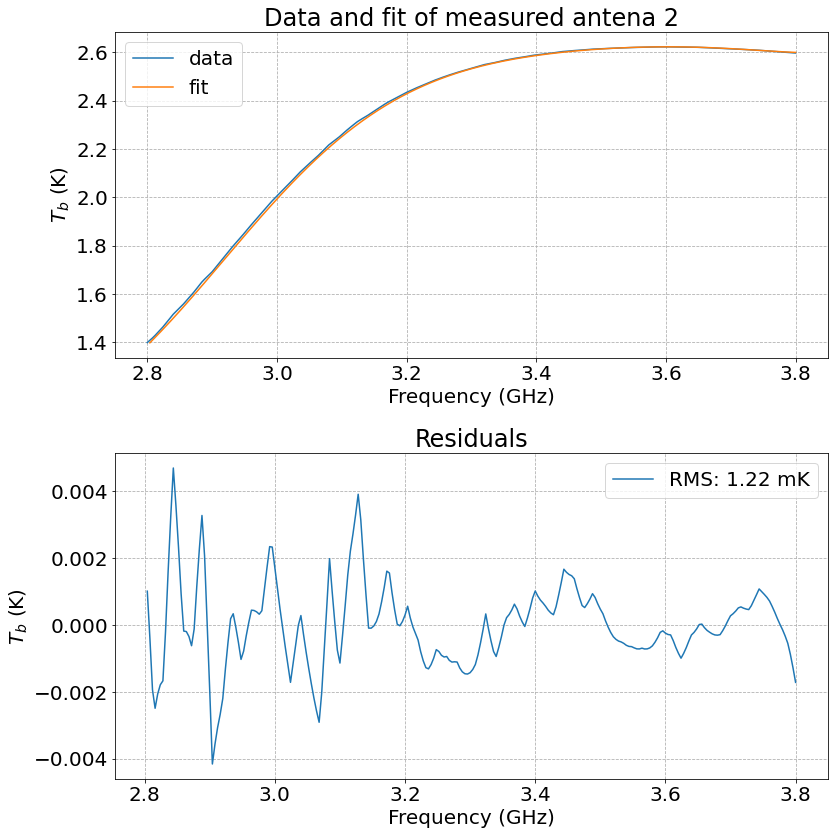

In [35]:
rms_meas2 = RMS_data(np.ones(len(resmeas2)), resmeas2)
print(len(resmeas2))
nrow, ncol = 2, 1

xlabel = 'Frequency (GHz)'
ylabel = '$T_b$ (K)'
titles = ['Data and fit of measured antena 2', 'Residuals']

fig, ax = plt.subplots(nrow, ncol, figsize=(12*ncol,6*nrow))
ax[0].plot(x, spectra_, label='data')
ax[0].plot(x[1:251], fitmeas2, label='fit')
ax[1].plot(x[1:251], resmeas2, label='RMS: {:.2f} mK'.format(rms_meas2*1e3))

for val, axx in enumerate(ax):
    axx.set_xlabel(xlabel)
    axx.set_ylabel(ylabel)
    axx.set_title(titles[val])
    axx.grid(ls='--')
    axx.legend()

fig.tight_layout()
plt.show()

RMS of smoothed masured data of ant1 is 1.001030383962412 mK
RMS of smoothed masured data of ant2 is 0.7249872118674544 mK


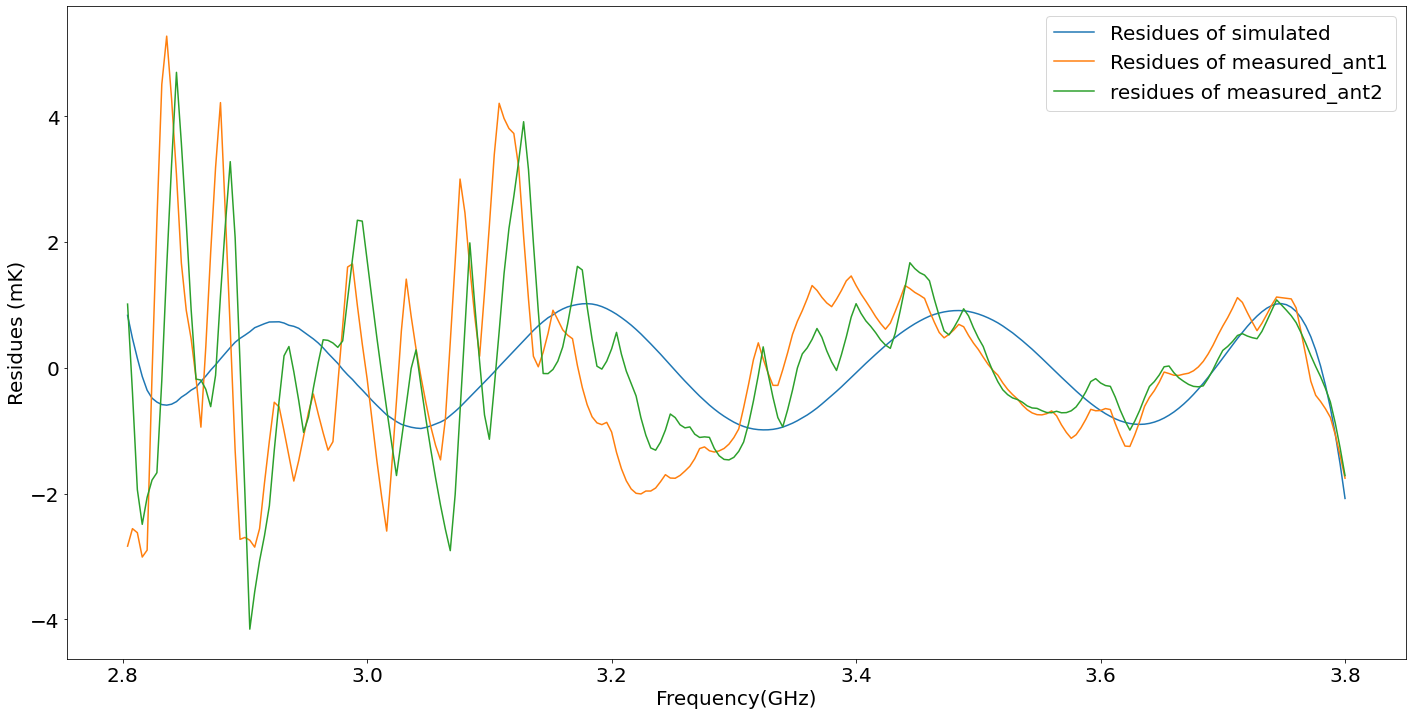

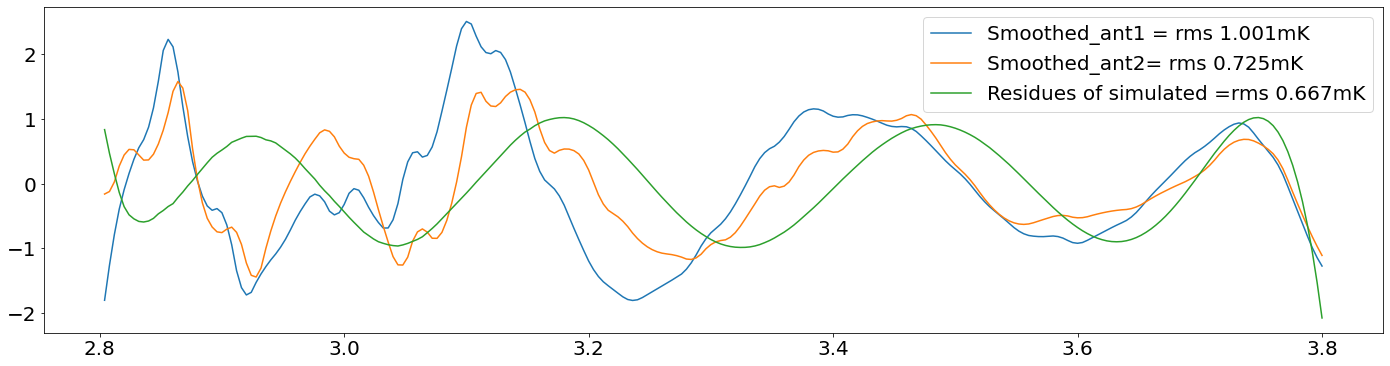

In [53]:
import scipy
from scipy.signal import savgol_filter


plt.figure(figsize=(24,12))
plt.plot(x[1:251],res*1000)
plt.plot(x[1:251],resmeas1*1000)
plt.plot(x[1:251],resmeas2*1000)
plt.xlabel('Frequency(GHz)');
plt.ylabel('Residues (mK)');
plt.legend(['Residues of simulated','Residues of measured_ant1','residues of measured_ant2'])

rms_smooth = RMS_data(np.ones(len(a)), a)
rms_smooth1 = RMS_data(np.ones(len(a_)), a_)

a=scipy.signal.savgol_filter(resmeas1,15,1,mode='nearest')
a_=scipy.signal.savgol_filter(resmeas2,15,1,mode='nearest')
plt.figure(figsize=(24,6))
plt.plot(x[1:251],a*1000)
plt.plot(x[1:251],a_*1000)
plt.plot(x[1:251],res*1000)
plt.legend(['Smoothed_ant1 = rms {:0.3f}mK'.format(rms_smooth*1e3),'Smoothed_ant2= rms {:0.3f}mK'.format(rms_smooth1*1e3),'Residues of simulated =rms {:0.3f}mK'.format(rms*1e3)])


print('RMS of smoothed masured data of ant1 is',rms_smooth*1000,'mK')
print('RMS of smoothed masured data of ant2 is',rms_smooth1*1000,'mK')